In [94]:
import numpy as np

B = np.array([[40, -26], [-26, 25]])

In [95]:
A = np.linalg.cholesky(B)
A@A.T

array([[ 40., -26.],
       [-26.,  25.]])

In [96]:
v, d, w = np.linalg.svd(B)
A = v @ np.diag(np.sqrt(d))
A@A.T

array([[ 40., -26.],
       [-26.,  25.]])

In [97]:
samples = A @ np.random.randn(2, 1000000)

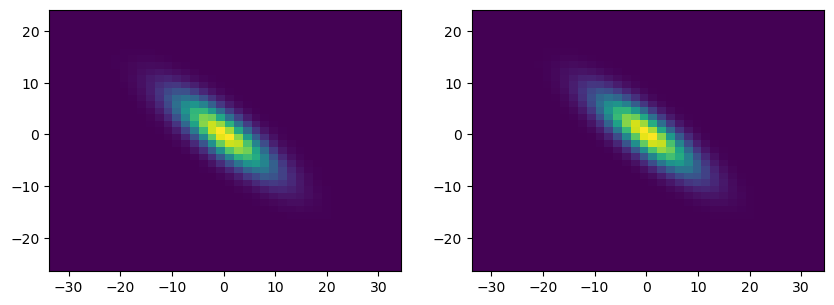

In [98]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

fig, ax = plt.subplots(1, 2, figsize=(10, 7))

h, x, y, _ = ax[0].hist2d(*samples, bins=40)
ax[0].set_aspect('equal')

grid = np.stack(np.meshgrid((x[1:] + x[:-1])/2, (y[1:] + y[:-1])/2))
pdf = multivariate_normal.pdf(grid.reshape(2, -1).T, cov=B).reshape(h.shape)

ax[1].imshow(pdf, origin='lower', extent=(x.min(), x.max(), y.min(), y.max()))
ax[1].set_aspect('equal')

plt.show()

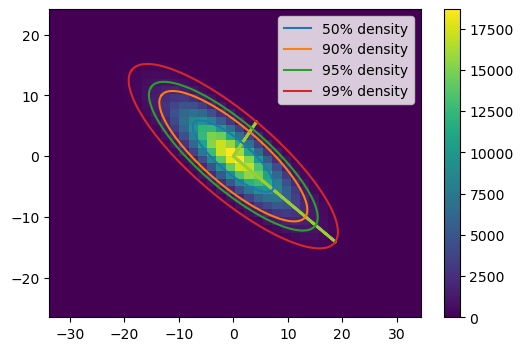

In [99]:
from scipy.stats import chi2

y=samples
# 2D гистограмма выборки
plt.figure(figsize=(6, 4))
plt.hist2d(y[0], y[1], bins=40)
plt.colorbar()

# Изображение эллипсов с плотностью вероятности
angles = np.linspace(0, 2 * np.pi, 100)
for percent in [50, 90, 95, 99]:
    radius = np.sqrt(chi2.ppf(percent/100, df=2)) # Вычисление радиуса эллипса
    x_ellipse = radius * np.cos(angles)
    y_ellipse = radius * np.sin(angles)
    ellipse = np.array([x_ellipse, y_ellipse])
    ellipse = A @ ellipse
    plt.plot(ellipse[0], ellipse[1], label=f'{percent}% density')

# Построение главных полуосей эллипса, охватывающего 99% плотности
eigenvalues,eigenvectors=np.linalg.eig(B)
for i in range(2):
    plt.arrow(0, 0, np.sqrt(np.abs(eigenvalues[i])) * np.abs(eigenvectors[0, i])* (np.sqrt(chi2.ppf(0.99, 2))), np.sqrt(eigenvalues[i]) * eigenvectors[1, i]* (np.sqrt(chi2.ppf(0.99, 2))), color='yellowgreen', linewidth=2, head_width=0, head_length=0)
plt.legend()
plt.show()